In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import stat as st

In [2]:
pred_data = pd.read_csv(r'data.csv')

In [3]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   CarName           205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

# PREPROCESSING & FEATURE ENGINEERING


In [4]:
#dropping columns that are statistically insignificant to the model
model_data = pred_data.drop(['Unnamed: 0', 'car_ID', 'CarName','fuelsystem', 'enginetype','doornumber'], axis=1)

In [5]:
# transforming 'symboling' to object since its a rating system on the risk of a vehicle purchase.
model_data['symboling'] = model_data['symboling'].astype('object')

In [6]:
#model_data.info()

In [7]:
# importing libraries that will transform data to be consumable by the predictive model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [8]:
#categorical features for one hot encoding
cat_features = model_data.select_dtypes(include='object').columns.tolist()

In [9]:
cat_features

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'cylindernumber',
 'carbrand']

In [10]:
#encoding categorical features with dummy method
encoded_data = pd.get_dummies(model_data, columns = cat_features)

In [11]:
encoded_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbrand_peugeot,carbrand_plymouth,carbrand_porsche,carbrand_renault,carbrand_saab,carbrand_subaru,carbrand_toyota,carbrand_vokswagen,carbrand_volkswagen,carbrand_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#splitting data into training and testing set
X = encoded_data.drop('price', axis=1)
y = encoded_data[['price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [13]:
print('Features:',X[:10], '\n Labels:', y[:10], sep='\n')

Features:
   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   
5       99.8      177.3      66.3       53.1        2507         136   
6      105.8      192.7      71.4       55.7        2844         136   
7      105.8      192.7      71.4       55.7        2954         136   
8      105.8      192.7      71.4       55.9        3086         131   
9       99.5      178.2      67.9       52.0        3053         131   

   boreratio  stroke  compressionratio  horsepower  ...  carbrand_peugeot  \
0       3.47    2.68               9.0         111  ...                 0   
1       3.47    2.68               9.0     

In [14]:
#standardizing numerical features of train dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Hyperparameter tuning
For this we will use the elastic net model which has variables for L1 and L2 regularization

In [15]:
from sklearn.linear_model import ElasticNet

In [16]:
#creating an instance of the linear regression model
model = ElasticNet()

In [17]:
# to obtain the obtain the optimal values for the hyperparameters, we will use GridSearch
from sklearn.model_selection import GridSearchCV

In [18]:
grid_parameters = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [19]:
grid_model = GridSearchCV(estimator= model,
                          param_grid=grid_parameters,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [20]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11922031.15704766, tolerance: 632278.7173878575
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8714442.96724835, tolerance: 759910.6451935276
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10632405.38879639, tolerance: 709486.1159965218
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective 

[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5979297.625104487, tolerance: 786859.4005519153
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7026892.707144439, tolerance: 632278.7173878575
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19471300.42147951, tolerance: 759910.6451935276
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [21]:
grid_model.best_params_

{'alpha': 50, 'l1_ratio': 1}

In [22]:
grid_model.best_estimator_

ElasticNet(alpha=50, l1_ratio=1)

In [23]:
#lin_model = ElasticNet(alpha= 50, l1_ratio= 1)

In [24]:
#lin_model.fit(X_train, y_train)

In [25]:
y_pred = grid_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6856999.329879817

The MSE is rather large and there will thus be  a need for a differrent regression model to fit the data. A Polynomial regression model will be tested out

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(2,5):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

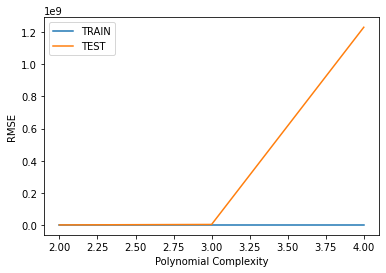

In [33]:
plt.plot(range(2,5),train_rmse_errors,label='TRAIN')
plt.plot(range(2,5),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
#plt.ylim(0,100)
plt.legend()

In [34]:
#choosing a polynomial complexity of 3
poly_model = PolynomialFeatures(degree=3, include_bias= False)
poly_model = poly_model.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_model, y, test_size=0.3, random_state=42)
    # TRAIN ON THIS NEW POLY SET
model = ElasticNet(alpha=50, l1_ratio=1)
model.fit(X_train,y_train)
# PREDICT ON BOTH TRAIN AND TEST
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11568315.042890286, tolerance: 871579.5255248253
  model = cd_fast.enet_coordinate_descent(


In [36]:
mean_squared_error(test_pred, y_test)

22083087.57393524

In [37]:
#choosing a polynomial complexity of 3
poly_model = PolynomialFeatures(degree=2, include_bias= False)
poly_model = poly_model.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_model, y, test_size=0.3, random_state=42)
    # TRAIN ON THIS NEW POLY SET
model = ElasticNet(alpha=50, l1_ratio=1)
model.fit(X_train,y_train)
# PREDICT ON BOTH TRAIN AND TEST
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30208234.140262485, tolerance: 871579.5255248253
  model = cd_fast.enet_coordinate_descent(


In [38]:
mean_squared_error(test_pred, y_test)

5630010.2401590245

In [39]:
test_pred

array([31175.48849286, 26038.26876589,  8487.69063878, 12594.97687235,
       27324.05632625,  7193.42814706,  8188.29358943,  8103.20732065,
       10862.05241924,  9324.13739314, 11986.68357243,  7474.3133633 ,
       15443.71015798, 10835.24186566, 33742.24475638,  6100.70320214,
        4229.06136512, 13613.3967251 ,  7841.75564588,  9449.44268702,
       10544.52611587, 14657.48663113,  2593.55318453,  6730.13119264,
        7899.14046478, 34339.98688553,  8735.07946608, 16470.4800128 ,
        7764.73156443, 15785.97173517, 26749.31491608,  6473.69003463,
        3944.50661666, 16928.98910621,  7675.19695461, 33354.16576629,
       11068.24221401, 13639.94251816,  9715.08152041, 14966.68578216,
        8318.86136417, 14893.96085708, 16229.950237  ,  6953.36143192,
        6971.52164587,  9821.00084054,  6888.02494133,  7114.32313138,
       16176.89488195, 11998.60773029,  5055.11662047, 15109.67089664,
        5898.96867845,  8973.20516279,  7691.82213345, 13233.54116359,
      

In [40]:
y_test

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
...,...
56,11845.000
128,37028.000
76,5389.000
144,9233.000


In [ ]:
#assessing model accuracy of polynomial regression model
test_accuracy = 